In [1]:
import numpy as np
import pandas as pd
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import r2_score

from meteostat import Point, Daily, Hourly

from IPython.display import clear_output          #For Jupyter Notebook

import warnings 
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
df_data = pd.read_csv(r'citibikeDemand.csv') # usecols=['StartStationId', 'EndStationId', 'Demand']
df_data.head()

,DemandDate,StartStationId,EndStationId,DemandTime,Demand,Temperature,DailySnowFall,DailyPrecipitation,Customer_prop,DayOfWeek,Month,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,TripDurationMinutes,DistanceMiles,StartStationName,StartStationLatitude,StartStationLongitude,StartNeighborhood,EndStationName,EndStationLatitude,EndStationLongitude,EndNeighborhood
0,6/1/2017,83,3368,evening,20,72.491228,0.0,NaN,0.096491,Thursday,6,61845.0,0.665331,64040.0,0.544903,6.983333,0.848879,Atlantic Ave & Fort Greene P,40.683826,-73.976323,Brooklyn,5 Ave & 3 St,40.672815,-73.983524,Park Slope
1,6/1/2017,128,309,daytime,37,72.491228,0.0,NaN,0.096491,Thursday,6,115888.0,0.785282,166343.0,0.684287,7.558333,0.989021,MacDougal St & Prince St,40.727103,-74.002971,Soho,Murray St & West St,40.714979,-74.013012,Tribeca
2,6/1/2017,128,394,daytime,37,72.491228,0.0,NaN,0.096491,Thursday,6,115888.0,0.785282,46499.0,0.805901,11.483333,1.333922,MacDougal St & Prince St,40.727103,-74.002971,Soho,E 9 St & Avenue C,40.725213,-73.977688,East Village
3,6/1/2017,152,3329,evening,28,72.491228,0.0,NaN,0.096491,Thursday,6,166343.0,0.684287,56806.0,0.584432,17.150000,2.350331,Warren St & Church St,40.714740,-74.009106,Tribeca,Degraw St & Smith St,40.682915,-73.993182,Carroll Gardens
4,6/1/2017,161,518,evening,79,72.491228,0.0,NaN,0.096491,Thursday,6,79481.0,0.821732,87451.0,0.822561,21.316667,1.824782,LaGuardia Pl & W 3 St,40.729170,-73.998102,Greenwich Village,E 39 St & 2 Ave,40.747804,-73.973442,Murray Hill


In [3]:
# df_data['EndStationId'].value_counts().head().reset_index().EndStationId.tolist()

In [4]:
stations = [519, 426, 497, 435, 402]

col_dummies = ['DayOfWeek', 'Month','DemandTime',]

col_numeric = ['Temperature', 'DailySnowFall', 'DailyPrecipitation', 'Customer_prop', 
 'StartPerCapitaIncome', 'StartPctHouseholdsNoVehicle', 'EndPerCapitaIncome', 
 'EndPctHouseholdsNoVehicle', 'TripDurationMinutes', 'DistanceMiles',
 'StartStationLatitude', 'StartStationLongitude','EndStationLatitude', 'EndStationLongitude','Demand',]

df_test = df_data[(df_data['DemandDate']!='6/1/2018')
                 &((df_data['StartStationId'].isin(stations))
                 |(df_data['EndStationId'].isin(stations)))][['StartStationId', 'EndStationId',]+col_dummies+col_numeric]

display(df_test.head())

for i in col_numeric:
    df_test[i] = df_test[i].fillna(df_test[i].mean())
    
display(df_test.head())

,StartStationId,EndStationId,DayOfWeek,Month,DemandTime,Temperature,DailySnowFall,DailyPrecipitation,Customer_prop,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,TripDurationMinutes,DistanceMiles,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,Demand
5,168,402,Thursday,6,daytime,72.491228,0.0,NaN,0.096491,113379.0,0.793897,83240.0,0.763597,3.400000,0.266727,40.739713,-73.994564,40.740343,-73.989551,53
24,359,426,Thursday,6,evening,72.491228,0.0,NaN,0.096491,103346.0,0.813400,132007.0,0.742810,28.500000,3.278230,40.755103,-73.974987,40.717548,-74.013221,79
33,402,509,Thursday,6,evening,72.491228,0.0,NaN,0.096491,83240.0,0.763597,113379.0,0.793897,5.570000,0.742708,40.740343,-73.989551,40.745497,-74.001971,163
34,402,545,Thursday,6,evening,72.491228,0.0,NaN,0.096491,83240.0,0.763597,83240.0,0.763597,10.252381,0.657258,40.740343,-73.989551,40.736502,-73.978095,163
38,426,415,Thursday,6,daytime,72.491228,0.0,NaN,0.096491,132007.0,0.742810,95707.0,0.806533,11.833333,0.909631,40.717548,-74.013221,40.704718,-74.009260,77


,StartStationId,EndStationId,DayOfWeek,Month,DemandTime,Temperature,DailySnowFall,DailyPrecipitation,Customer_prop,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,TripDurationMinutes,DistanceMiles,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,Demand
5,168,402,Thursday,6,daytime,72.491228,0.0,0.0778,0.096491,113379.0,0.793897,83240.0,0.763597,3.400000,0.266727,40.739713,-73.994564,40.740343,-73.989551,53
24,359,426,Thursday,6,evening,72.491228,0.0,0.0778,0.096491,103346.0,0.813400,132007.0,0.742810,28.500000,3.278230,40.755103,-73.974987,40.717548,-74.013221,79
33,402,509,Thursday,6,evening,72.491228,0.0,0.0778,0.096491,83240.0,0.763597,113379.0,0.793897,5.570000,0.742708,40.740343,-73.989551,40.745497,-74.001971,163
34,402,545,Thursday,6,evening,72.491228,0.0,0.0778,0.096491,83240.0,0.763597,83240.0,0.763597,10.252381,0.657258,40.740343,-73.989551,40.736502,-73.978095,163
38,426,415,Thursday,6,daytime,72.491228,0.0,0.0778,0.096491,132007.0,0.742810,95707.0,0.806533,11.833333,0.909631,40.717548,-74.013221,40.704718,-74.009260,77


In [5]:
df_test = pd.get_dummies(df_test, columns=col_dummies, dtype=float)
df_test.head()

,StartStationId,EndStationId,Temperature,DailySnowFall,DailyPrecipitation,Customer_prop,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,TripDurationMinutes,DistanceMiles,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,Demand,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DemandTime_daytime,DemandTime_evening
5,168,402,72.491228,0.0,0.0778,0.096491,113379.0,0.793897,83240.0,0.763597,3.400000,0.266727,40.739713,-73.994564,40.740343,-73.989551,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24,359,426,72.491228,0.0,0.0778,0.096491,103346.0,0.813400,132007.0,0.742810,28.500000,3.278230,40.755103,-73.974987,40.717548,-74.013221,79,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,402,509,72.491228,0.0,0.0778,0.096491,83240.0,0.763597,113379.0,0.793897,5.570000,0.742708,40.740343,-73.989551,40.745497,-74.001971,163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34,402,545,72.491228,0.0,0.0778,0.096491,83240.0,0.763597,83240.0,0.763597,10.252381,0.657258,40.740343,-73.989551,40.736502,-73.978095,163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,426,415,72.491228,0.0,0.0778,0.096491,132007.0,0.742810,95707.0,0.806533,11.833333,0.909631,40.717548,-74.013221,40.704718,-74.009260,77,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# df_data[df_data['EndStationId']==519].sort_values('DemandDate')

In [7]:
sc = StandardScaler()
X = sc.fit_transform(df_test)
df_test = pd.DataFrame(X, columns=df_test.columns)
df_test.head()

,StartStationId,EndStationId,Temperature,DailySnowFall,DailyPrecipitation,Customer_prop,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,TripDurationMinutes,DistanceMiles,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,Demand,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DemandTime_daytime,DemandTime_evening
0,-0.647246,-0.335168,0.643812,-0.126303,-6.812293e-17,0.007055,0.742122,0.117223,-0.623092,-0.721630,-1.125359,-0.985394,0.003581,-0.253850,0.044882,0.150368,-0.766728,-0.420194,-0.417985,-0.32676,-0.33093,2.124801,-0.451402,-0.428987,-0.217349,-0.230546,-0.241099,-0.284816,-0.346497,2.984473,-0.337536,-0.345688,-0.348112,-0.348112,-0.296563,-0.253305,1.248542,-1.248542
1,-0.413165,-0.303153,0.643812,-0.126303,-6.812293e-17,0.007055,0.271848,0.674423,1.529840,-1.312220,1.850450,2.217565,1.012920,1.311123,-1.425907,-1.743075,-0.283882,-0.420194,-0.417985,-0.32676,-0.33093,2.124801,-0.451402,-0.428987,-0.217349,-0.230546,-0.241099,-0.284816,-0.346497,2.984473,-0.337536,-0.345688,-0.348112,-0.348112,-0.296563,-0.253305,-0.800934,0.800934
2,-0.360466,-0.192437,0.643812,-0.126303,-6.812293e-17,0.007055,-0.670575,-0.748404,0.707464,0.139252,-0.868088,-0.479153,0.044913,0.146881,0.377440,-0.843191,1.276083,-0.420194,-0.417985,-0.32676,-0.33093,2.124801,-0.451402,-0.428987,-0.217349,-0.230546,-0.241099,-0.284816,-0.346497,2.984473,-0.337536,-0.345688,-0.348112,-0.348112,-0.296563,-0.253305,-0.800934,0.800934
3,-0.360466,-0.144415,0.643812,-0.126303,-6.812293e-17,0.007055,-0.670575,-0.748404,-0.623092,-0.721630,-0.312953,-0.570034,0.044913,0.146881,-0.202963,1.066816,1.276083,-0.420194,-0.417985,-0.32676,-0.33093,2.124801,-0.451402,-0.428987,-0.217349,-0.230546,-0.241099,-0.284816,-0.346497,2.984473,-0.337536,-0.345688,-0.348112,-0.348112,-0.296563,-0.253305,-0.800934,0.800934
4,-0.331053,-0.317826,0.643812,-0.126303,-6.812293e-17,0.007055,1.615267,-1.342250,-0.072707,0.498269,-0.125518,-0.301617,-1.450100,-1.745243,-2.253776,-1.426262,-0.321024,-0.420194,-0.417985,-0.32676,-0.33093,2.124801,-0.451402,-0.428987,-0.217349,-0.230546,-0.241099,-0.284816,-0.346497,2.984473,-0.337536,-0.345688,-0.348112,-0.348112,-0.296563,-0.253305,1.248542,-1.248542


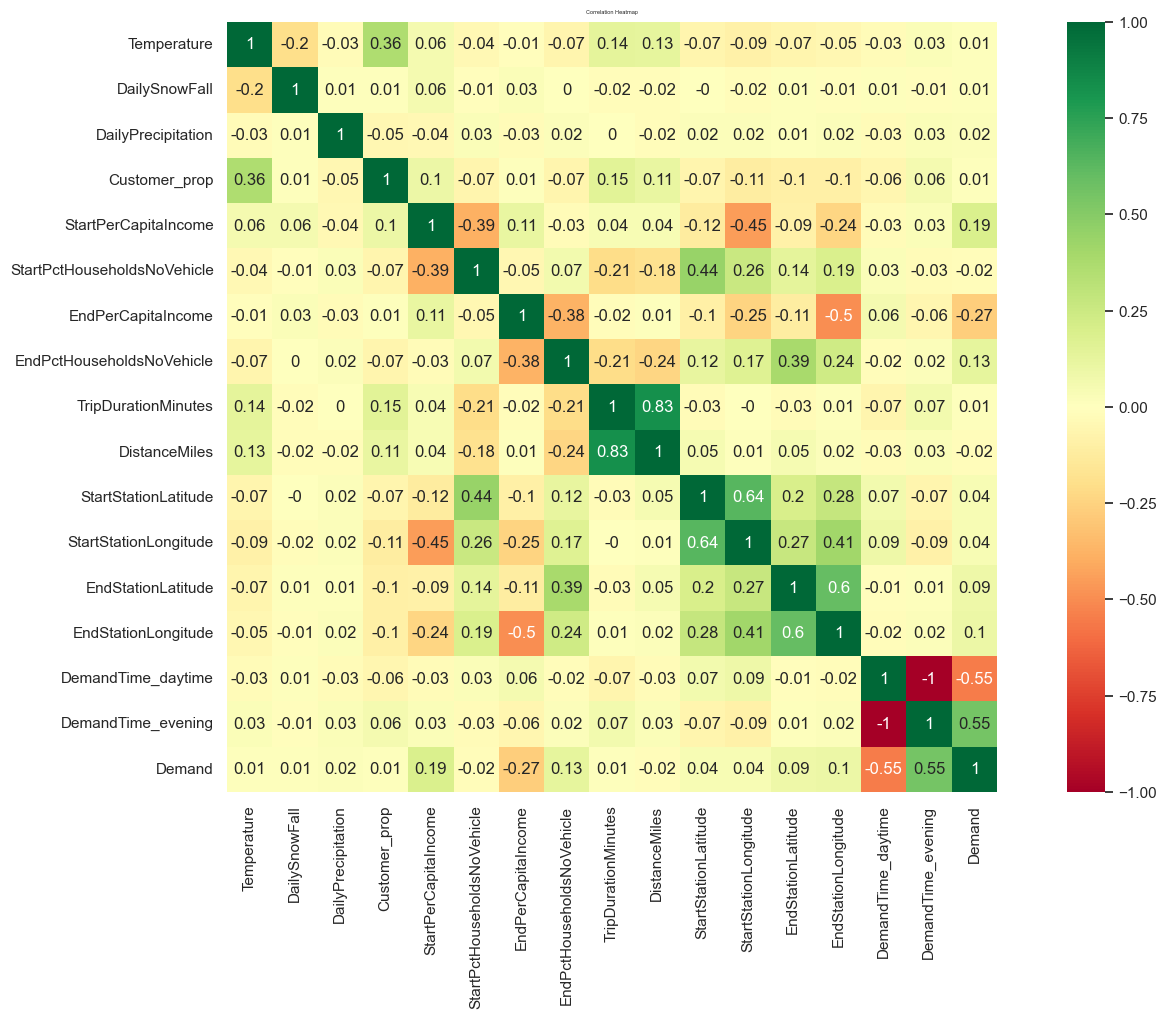

In [8]:
plt.figure(figsize= (18,10))

df_corr = df_test[[
 'Temperature',
 'DailySnowFall',
 'DailyPrecipitation',
 'Customer_prop',
 'StartPerCapitaIncome',
 'StartPctHouseholdsNoVehicle',
 'EndPerCapitaIncome',
 'EndPctHouseholdsNoVehicle',
 'TripDurationMinutes',
 'DistanceMiles',
    'StartStationLatitude', 'StartStationLongitude','EndStationLatitude', 'EndStationLongitude',
    
    'DemandTime_daytime','DemandTime_evening',
# 'DayOfWeek_Friday','DayOfWeek_Monday','DayOfWeek_Saturday','DayOfWeek_Sunday','DayOfWeek_Thursday','DayOfWeek_Tuesday','DayOfWeek_Wednesday',
#     'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12',
    
    
    
    'Demand',]].corr().round(2)

sns.heatmap(df_corr, cmap='RdYlGn', annot=True, vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=4)
plt.show()

# Modelling

In [9]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [10]:
from matplotlib import legend
from sklearn.metrics import r2_score, mean_squared_error

# Function for evaluation metric for regression
def EvaluationMetric(yt, yp, shp=1, n=2):
    MSE = round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=round((np.sqrt(MSE)), 4)
    R2= round((r2_score(y_true=yt,y_pred=yp)), 4)
    Adjusted_R2= round(1-((1-R2)*(shp-1))/(shp-n-1), 4)
    
    print("MSE :", MSE, "RMSE :", RMSE)
    print("R2 :", R2, "Adjusted R2 :", Adjusted_R2)

    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((np.array(yt[:100])))
    plt.plot((yp[:100])) 
    plt.legend(["Actual","Predicted",])
    plt.title('Actual and Predicted Time Duration')

## Linear

In [11]:
from sklearn.model_selection import train_test_split 

# df_data = df_test[cols+['Demand']]

X = df_test.drop(columns=['Demand'])
y = df_test['Demand']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33, shuffle=True) 

In [13]:
model = LinearRegression()
params = {'fit_intercept':[True, False],'positive':[True, False], 'n_jobs':[-1]}

clf =  GridSearchCV(model, params, cv=5, return_train_score=False, verbose=2)
clf.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=False, n_jobs=-1, positive=True; total time=   0.0s
[CV] END ......fit_intercept=False, n_jobs=-1, po

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [True, False]},
             verbose=2)

In [14]:
print(clf.best_params_, round(clf.best_score_, 4))

{'fit_intercept': False, 'n_jobs': -1, 'positive': False} -4.3947649342657735e+23


In [15]:
model = LinearRegression(**clf.best_params_)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

MSE : 0.5201 RMSE : 0.7212
R2 : 0.4705 Adjusted R2 : 0.4426


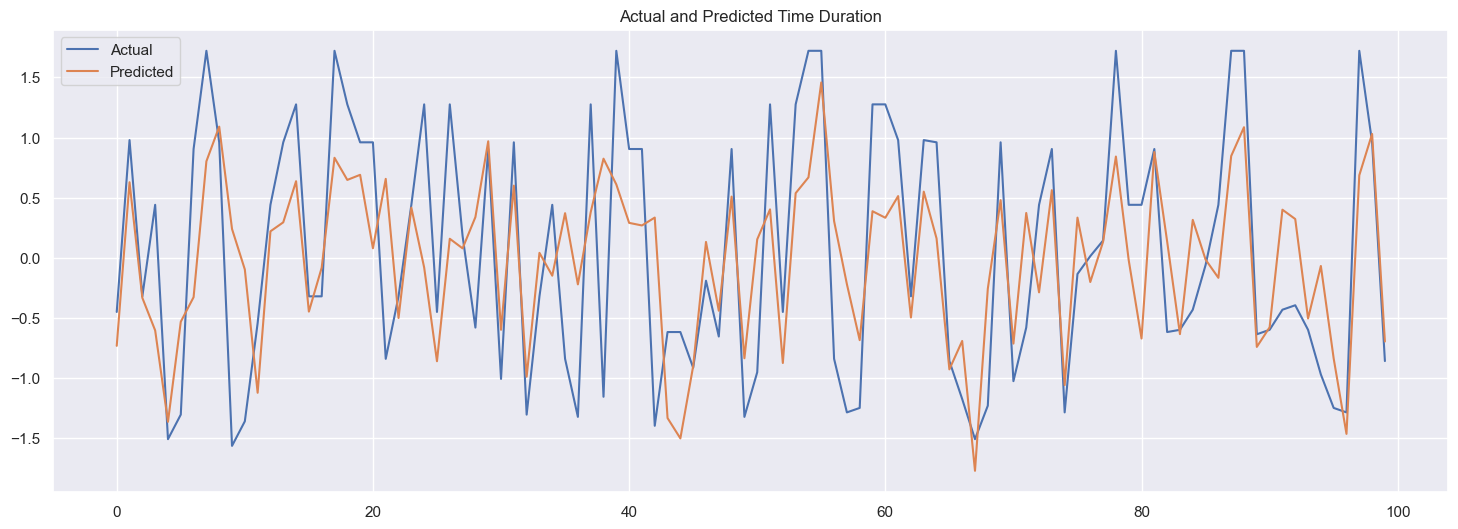

In [16]:
y_pred = model.predict(X_test)
EvaluationMetric(y_test, y_pred, shp=X_test.shape[0], n=X_test.shape[1])

## RandomForest

In [17]:
model = RandomForestRegressor(n_jobs=-1)
params = {
    'n_estimators': [10,100,1000],
    'max_depth': [2, 6, 9, 12],
    #       'min_samples_leaf': [100,200,300,500,1000],
          # 'criterion' : ['absolute_error', 'squared_error'], 
    'n_jobs':[-1]}

clf =  GridSearchCV(model, params, cv=2, return_train_score=False, verbose=2)
clf.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ............max_depth=2, n_estimators=10, n_jobs=-1; total time=   3.5s
[CV] END ............max_depth=2, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ...........max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...........max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ..........max_depth=2, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ..........max_depth=2, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ............max_depth=6, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ............max_depth=6, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ...........max_depth=6, n_estimators=100, n_jobs=-1; total time=   0.2s
[CV] END ...........max_depth=6, n_estimators=100, n_jobs=-1; total time=   0.2s
[CV] END ..........max_depth=6, n_estimators=1000, n_jobs=-1; total time=   3.0s
[CV] END ..........max_depth=6, n_estimators=100

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [2, 6, 9, 12],
                         'n_estimators': [10, 100, 1000], 'n_jobs': [-1]},
             verbose=2)

In [18]:
print(clf.best_params_, round(clf.best_score_, 4))

{'max_depth': 12, 'n_estimators': 100, 'n_jobs': -1} 0.9475


In [19]:
model = RandomForestRegressor(**clf.best_params_)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1)

MSE : 0.0425 RMSE : 0.2062
R2 : 0.9568 Adjusted R2 : 0.9545


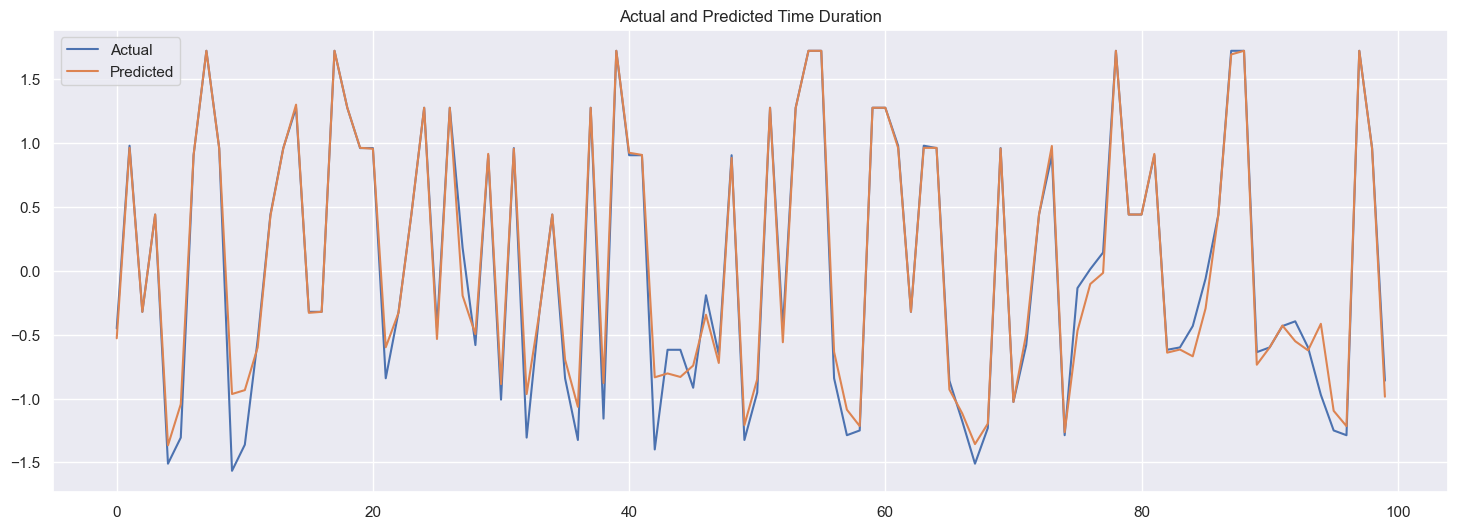

In [20]:
y_pred = model.predict(X_test)
EvaluationMetric(y_test, y_pred, shp=X_test.shape[0], n=X_test.shape[1])

# Subset Testing

In [21]:
stations = [519, 426, 497, 435, 402]

col_dummies = ['StartStationId', 'EndStationId','DemandTime',]

col_numeric = ['Demand',
 'StartPerCapitaIncome', 'StartPctHouseholdsNoVehicle', 'EndPerCapitaIncome', 
 'EndPctHouseholdsNoVehicle', 
 'StartStationLatitude', 'StartStationLongitude','EndStationLatitude', 'EndStationLongitude',]

df_test = df_data[(df_data['DemandDate']!='6/1/2018')
                 &((df_data['StartStationId'].isin(stations))
                 |(df_data['EndStationId'].isin(stations)))][col_dummies+col_numeric]

display(df_test.head())

for i in col_numeric:
    df_test[i] = df_test[i].fillna(df_test[i].mean())
    
display(df_test.head())

,StartStationId,EndStationId,DemandTime,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude
5,168,402,daytime,53,113379.0,0.793897,83240.0,0.763597,40.739713,-73.994564,40.740343,-73.989551
24,359,426,evening,79,103346.0,0.813400,132007.0,0.742810,40.755103,-73.974987,40.717548,-74.013221
33,402,509,evening,163,83240.0,0.763597,113379.0,0.793897,40.740343,-73.989551,40.745497,-74.001971
34,402,545,evening,163,83240.0,0.763597,83240.0,0.763597,40.740343,-73.989551,40.736502,-73.978095
38,426,415,daytime,77,132007.0,0.742810,95707.0,0.806533,40.717548,-74.013221,40.704718,-74.009260


,StartStationId,EndStationId,DemandTime,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude
5,168,402,daytime,53,113379.0,0.793897,83240.0,0.763597,40.739713,-73.994564,40.740343,-73.989551
24,359,426,evening,79,103346.0,0.813400,132007.0,0.742810,40.755103,-73.974987,40.717548,-74.013221
33,402,509,evening,163,83240.0,0.763597,113379.0,0.793897,40.740343,-73.989551,40.745497,-74.001971
34,402,545,evening,163,83240.0,0.763597,83240.0,0.763597,40.740343,-73.989551,40.736502,-73.978095
38,426,415,daytime,77,132007.0,0.742810,95707.0,0.806533,40.717548,-74.013221,40.704718,-74.009260


In [22]:
df_test = pd.get_dummies(df_test, columns=['DemandTime'], dtype=float)
df_test.head()

,StartStationId,EndStationId,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
5,168,402,53,113379.0,0.793897,83240.0,0.763597,40.739713,-73.994564,40.740343,-73.989551,1.0,0.0
24,359,426,79,103346.0,0.813400,132007.0,0.742810,40.755103,-73.974987,40.717548,-74.013221,0.0,1.0
33,402,509,163,83240.0,0.763597,113379.0,0.793897,40.740343,-73.989551,40.745497,-74.001971,0.0,1.0
34,402,545,163,83240.0,0.763597,83240.0,0.763597,40.740343,-73.989551,40.736502,-73.978095,0.0,1.0
38,426,415,77,132007.0,0.742810,95707.0,0.806533,40.717548,-74.013221,40.704718,-74.009260,1.0,0.0


In [23]:
sc = StandardScaler()
X = sc.fit_transform(df_test)
df_test = pd.DataFrame(X, columns=df_test.columns)
df_test.head()

,StartStationId,EndStationId,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
0,-0.647246,-0.335168,-0.766728,0.742122,0.117223,-0.623092,-0.721630,0.003581,-0.253850,0.044882,0.150368,1.248542,-1.248542
1,-0.413165,-0.303153,-0.283882,0.271848,0.674423,1.529840,-1.312220,1.012920,1.311123,-1.425907,-1.743075,-0.800934,0.800934
2,-0.360466,-0.192437,1.276083,-0.670575,-0.748404,0.707464,0.139252,0.044913,0.146881,0.377440,-0.843191,-0.800934,0.800934
3,-0.360466,-0.144415,1.276083,-0.670575,-0.748404,-0.623092,-0.721630,0.044913,0.146881,-0.202963,1.066816,-0.800934,0.800934
4,-0.331053,-0.317826,-0.321024,1.615267,-1.342250,-0.072707,0.498269,-1.450100,-1.745243,-2.253776,-1.426262,1.248542,-1.248542


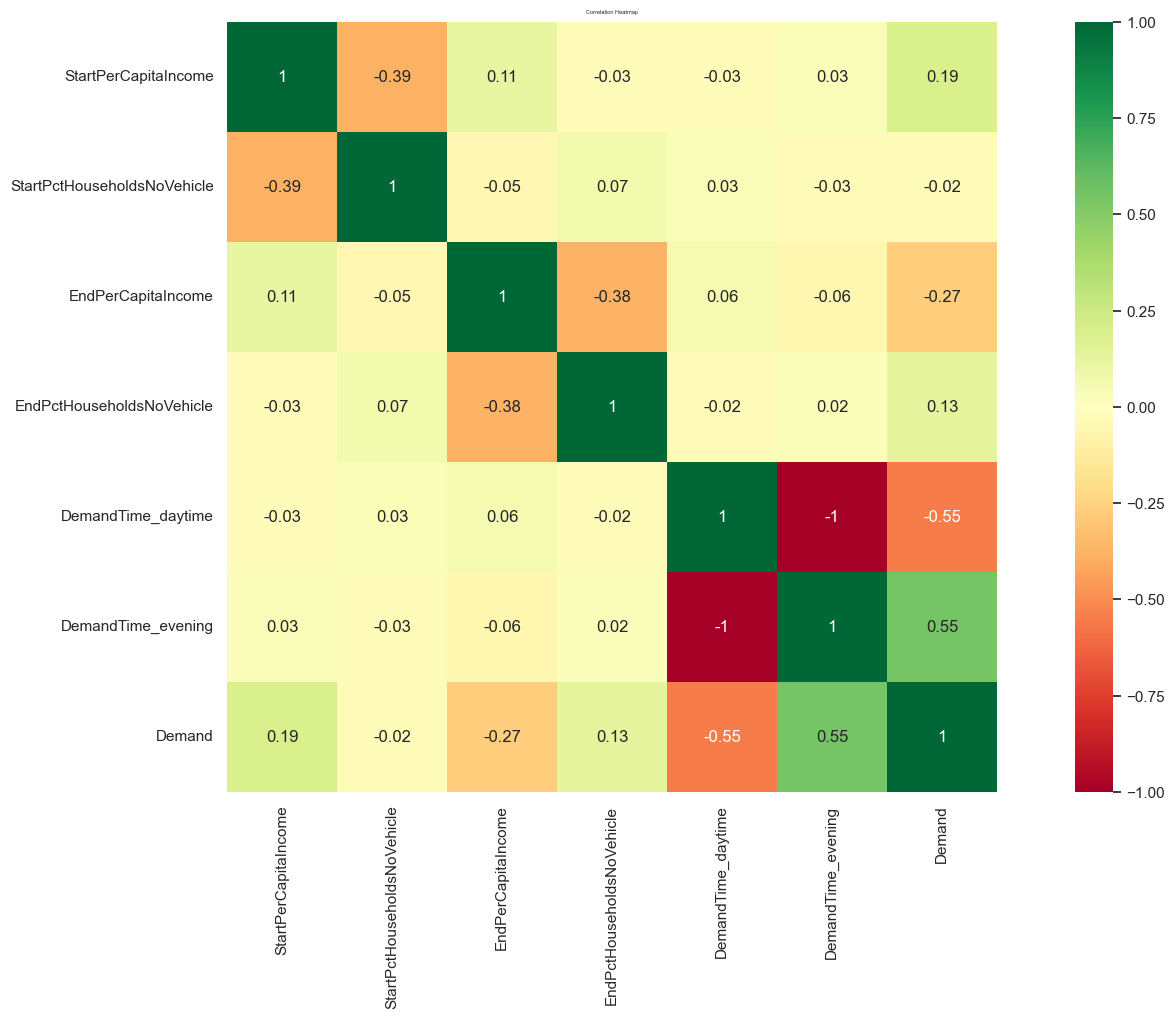

In [24]:
plt.figure(figsize= (20,10))

df_corr = df_test[[
 'StartPerCapitaIncome',
 'StartPctHouseholdsNoVehicle',
 'EndPerCapitaIncome',
 'EndPctHouseholdsNoVehicle',
'DemandTime_daytime','DemandTime_evening',
# 'DayOfWeek_Friday','DayOfWeek_Monday','DayOfWeek_Saturday','DayOfWeek_Sunday','DayOfWeek_Thursday','DayOfWeek_Tuesday','DayOfWeek_Wednesday',
#     'Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12',
    
    
    
    'Demand',]].corr().round(2)

sns.heatmap(df_corr, cmap='RdYlGn', annot=True, vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=4)
plt.show()

# Modelling

In [25]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [26]:
from matplotlib import legend
from sklearn.metrics import r2_score, mean_squared_error

# Function for evaluation metric for regression
def EvaluationMetric(yt, yp, shp=1, n=2):
    MSE = round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=round((np.sqrt(MSE)), 4)
    R2= round((r2_score(y_true=yt,y_pred=yp)), 4)
    Adjusted_R2= round(1-((1-R2)*(shp-1))/(shp-n-1), 4)
    
    print("MSE :", MSE, "RMSE :", RMSE)
    print("R2 :", R2, "Adjusted R2 :", Adjusted_R2)

    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((np.array(yt[:100])))
    plt.plot((yp[:100])) 
    plt.legend(["Actual","Predicted",])
    plt.title('Actual and Predicted Time Duration')

## Linear

In [27]:
from sklearn.model_selection import train_test_split 

X = df_test.drop(columns=['Demand'])
y = df_test['Demand']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33, shuffle=True) 

In [29]:
model = LinearRegression()
params = {'fit_intercept':[True, False],'positive':[True, False], 'n_jobs':[-1]}

clf =  GridSearchCV(model, params, cv=5, return_train_score=False, verbose=2)
clf.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END .......fit_intercept=True, n_jobs=-1, positive=True; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=True, n_jobs=-1, positive=False; total time=   0.0s
[CV] END ......fit_intercept=False, n_jobs=-1, positive=True; total time=   0.0s
[CV] END ......fit_intercept=False, n_jobs=-1, po

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [True, False]},
             verbose=2)

In [30]:
print(clf.best_params_, round(clf.best_score_, 4))

{'fit_intercept': False, 'n_jobs': -1, 'positive': False} 0.4948


In [31]:
linear_model = LinearRegression(**clf.best_params_)
linear_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

MSE : 0.5047 RMSE : 0.7104
R2 : 0.4863 Adjusted R2 : 0.4778


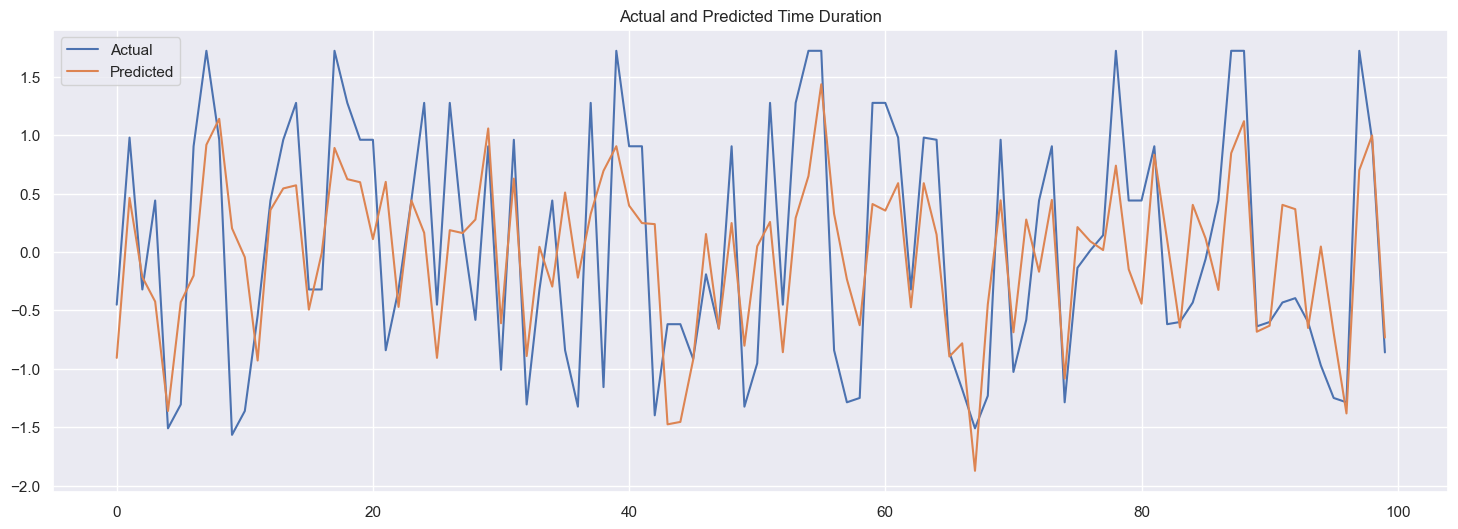

In [32]:
y_pred = linear_model.predict(X_test)
EvaluationMetric(y_test, y_pred, shp=X_test.shape[0], n=X_test.shape[1])

## RandomForest

In [33]:
model = RandomForestRegressor(n_jobs=-1)
params = {
    'n_estimators': [10,100,1000],
    'max_depth': [2, 6, 9, 12],
    #       'min_samples_leaf': [100,200,300,500,1000],
          # 'criterion' : ['absolute_error', 'squared_error'], 
    'n_jobs':[-1]}

clf =  GridSearchCV(model, params, cv=2, return_train_score=False, verbose=2)
clf.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ............max_depth=2, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ............max_depth=2, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ...........max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...........max_depth=2, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ..........max_depth=2, n_estimators=1000, n_jobs=-1; total time=   0.9s
[CV] END ..........max_depth=2, n_estimators=1000, n_jobs=-1; total time=   0.9s
[CV] END ............max_depth=6, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ............max_depth=6, n_estimators=10, n_jobs=-1; total time=   0.0s
[CV] END ...........max_depth=6, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ...........max_depth=6, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END ..........max_depth=6, n_estimators=1000, n_jobs=-1; total time=   1.6s
[CV] END ..........max_depth=6, n_estimators=100

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [2, 6, 9, 12],
                         'n_estimators': [10, 100, 1000], 'n_jobs': [-1]},
             verbose=2)

In [34]:
print(clf.best_params_, round(clf.best_score_, 4))

{'max_depth': 12, 'n_estimators': 1000, 'n_jobs': -1} 0.9591


In [35]:
rf_model = RandomForestRegressor(**clf.best_params_)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=1000, n_jobs=-1)

MSE : 0.0325 RMSE : 0.1803
R2 : 0.9669 Adjusted R2 : 0.9664


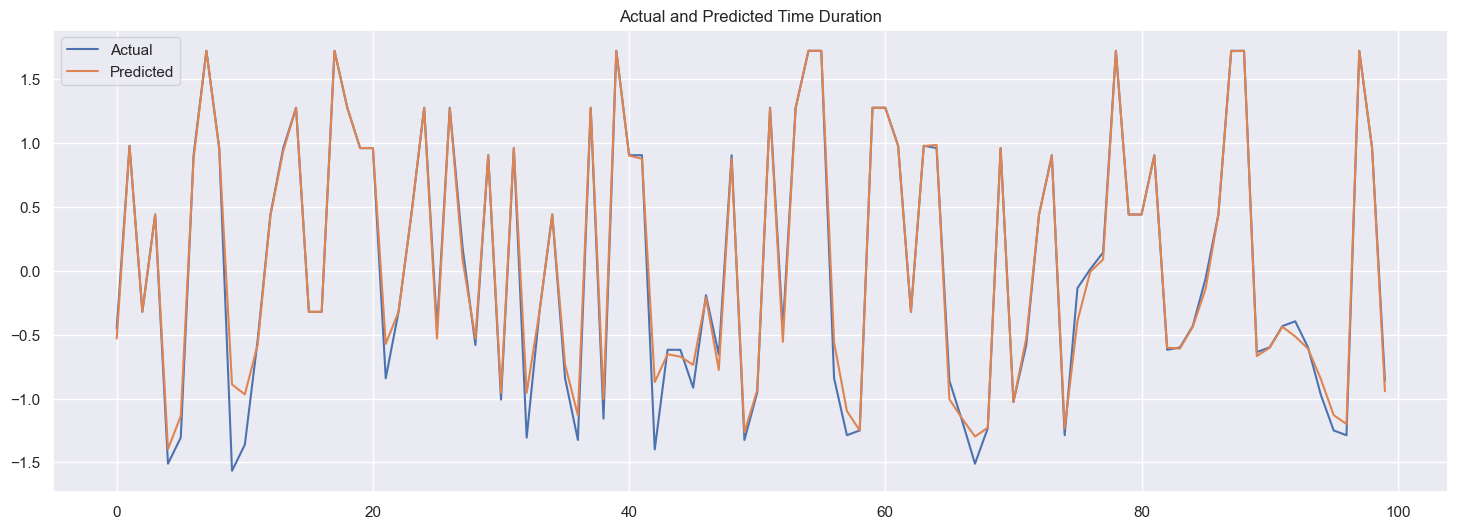

In [36]:
y_pred = rf_model.predict(X_test)
EvaluationMetric(y_test, y_pred, shp=X_test.shape[0], n=X_test.shape[1])

# Furture Date

In [37]:
stations = [519, 426, 497, 435, 402]

col_dummies = ['StartStationId', 'EndStationId','DemandTime',]

col_numeric = ['Demand',
 'StartPerCapitaIncome', 'StartPctHouseholdsNoVehicle', 'EndPerCapitaIncome', 
 'EndPctHouseholdsNoVehicle', 
 'StartStationLatitude', 'StartStationLongitude','EndStationLatitude', 'EndStationLongitude',]

df_test = df_data[(df_data['DemandDate']!='6/1/2018')
                 &((df_data['StartStationId'].isin(stations))
                 |(df_data['EndStationId'].isin(stations)))
                 ][col_dummies+col_numeric]

# display(df_test.head())

for i in col_numeric:
    df_test[i] = df_test[i].fillna(df_test[i].mean())
    
# display(df_test.head())

df_test = pd.get_dummies(df_test, columns=['DemandTime'], dtype=float)

In [38]:
df_start = df_test[(df_data['StartStationId'].isin(stations))][['StartStationId','StartPerCapitaIncome', 'StartPctHouseholdsNoVehicle', 'StartStationLatitude', 'StartStationLongitude',]].drop_duplicates()
df_end = df_test[(df_data['EndStationId'].isin(stations))][['EndStationId','EndPerCapitaIncome', 'EndPctHouseholdsNoVehicle', 'EndStationLatitude', 'EndStationLongitude',]].drop_duplicates()

df_future = pd.DataFrame()
df_future['DemandTime'] = (['daytime']*5+['evening']*5)*5
df_future['StartStationId'] = [519]*10+[426]*10+[497]*10+[435]*10+[402]*10
df_future['EndStationId'] = stations*10

df_future_start = df_future.merge(df_start, how='left', on='StartStationId')
df_future = df_future_start.merge(df_end, how='left', on='EndStationId')

df_future['Demand'] = 0

df_future = pd.get_dummies(df_future, columns=['DemandTime'], dtype=float)[df_test.columns]
df_future.head()

,StartStationId,EndStationId,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
0,519,519,0,103346.0,0.8134,103346.0,0.813400,40.751873,-73.977706,40.751873,-73.977706,1.0,0.0
1,519,426,0,103346.0,0.8134,132007.0,0.742810,40.751873,-73.977706,40.717548,-74.013221,1.0,0.0
2,519,497,0,103346.0,0.8134,85199.0,0.790190,40.751873,-73.977706,40.737050,-73.990093,1.0,0.0
3,519,435,0,103346.0,0.8134,113379.0,0.793897,40.751873,-73.977706,40.741740,-73.994156,1.0,0.0
4,519,402,0,103346.0,0.8134,83240.0,0.763597,40.751873,-73.977706,40.740343,-73.989551,1.0,0.0


In [39]:
X_future = sc.transform(df_future)
df_future = pd.DataFrame(X_future, columns=df_future.columns).drop(columns='Demand')
df_future.head()

,StartStationId,EndStationId,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
0,-0.217076,-0.179098,0.271848,0.674423,0.264534,0.693397,0.801101,1.093765,0.788818,1.097912,1.248542,-1.248542
1,-0.217076,-0.303153,0.271848,0.674423,1.529840,-1.312220,0.801101,1.093765,-1.425907,-1.743075,1.248542,-1.248542
2,-0.217076,-0.208444,0.271848,0.674423,-0.536607,0.033941,0.801101,1.093765,-0.167615,0.107021,1.248542,-1.248542
3,-0.217076,-0.291148,0.271848,0.674423,0.707464,0.139252,0.801101,1.093765,0.134988,-0.217966,1.248542,-1.248542
4,-0.217076,-0.335168,0.271848,0.674423,-0.623092,-0.721630,0.801101,1.093765,0.044882,0.150368,1.248542,-1.248542


## Linear

In [40]:
df_linear = df_future.copy()
y_linear = linear_model.predict(df_future)
df_linear['Demand'] = y_linear

X_linear = sc.inverse_transform(df_linear[df_test.columns])
df_linear = pd.DataFrame(X_linear, columns=df_test.columns)
df_linear.head()

,StartStationId,EndStationId,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
0,519.0,519.0,68.814179,103346.0,0.8134,103346.0,0.813400,40.751873,-73.977706,40.751873,-73.977706,1.0,0.0
1,519.0,426.0,68.716136,103346.0,0.8134,132007.0,0.742810,40.751873,-73.977706,40.717548,-74.013221,1.0,0.0
2,519.0,497.0,84.766712,103346.0,0.8134,85199.0,0.790190,40.751873,-73.977706,40.737050,-73.990093,1.0,0.0
3,519.0,435.0,71.424084,103346.0,0.8134,113379.0,0.793897,40.751873,-73.977706,40.741740,-73.994156,1.0,0.0
4,519.0,402.0,83.520061,103346.0,0.8134,83240.0,0.763597,40.751873,-73.977706,40.740343,-73.989551,1.0,0.0


In [41]:
df_linear_daytime = df_linear[df_linear['DemandTime_daytime']==1]
df_linear_evening = df_linear[df_linear['DemandTime_evening']==1]

df_linear_daytime_pivot = pd.pivot_table(df_linear_daytime, index='StartStationId', columns='EndStationId', values='Demand', aggfunc='sum').round(0).astype(int)
df_linear_evening_pivot = pd.pivot_table(df_linear_evening, index='StartStationId', columns='EndStationId', values='Demand', aggfunc='sum').round(0).astype(int)

In [42]:
df_linear_daytime_pivot

EndStationId,402.0,426.0,435.0,497.0,519.0
StartStationId,,,,,
402.0,58,44,46,60,44
426.0,65,51,53,67,51
435.0,74,60,62,76,60
497.0,58,43,46,60,44
519.0,84,69,71,85,69


In [43]:
df_linear_evening_pivot

EndStationId,402.0,426.0,435.0,497.0,519.0
StartStationId,,,,,
402.0,115,101,103,117,101
426.0,122,108,110,124,108
435.0,131,117,119,133,117
497.0,115,101,103,117,101
519.0,141,126,128,142,126


## RandForest

In [44]:
df_linear = df_future.copy()
y_linear = rf_model.predict(df_future)
df_linear['Demand'] = y_linear

X_linear = sc.inverse_transform(df_linear[df_test.columns])
df_linear = pd.DataFrame(X_linear, columns=df_test.columns)
df_linear.head()

,StartStationId,EndStationId,Demand,StartPerCapitaIncome,StartPctHouseholdsNoVehicle,EndPerCapitaIncome,EndPctHouseholdsNoVehicle,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude,DemandTime_daytime,DemandTime_evening
0,519.0,519.0,117.896,103346.0,0.8134,103346.0,0.813400,40.751873,-73.977706,40.751873,-73.977706,1.0,0.0
1,519.0,426.0,117.100,103346.0,0.8134,132007.0,0.742810,40.751873,-73.977706,40.717548,-74.013221,1.0,0.0
2,519.0,497.0,118.000,103346.0,0.8134,85199.0,0.790190,40.751873,-73.977706,40.737050,-73.990093,1.0,0.0
3,519.0,435.0,118.000,103346.0,0.8134,113379.0,0.793897,40.751873,-73.977706,40.741740,-73.994156,1.0,0.0
4,519.0,402.0,117.845,103346.0,0.8134,83240.0,0.763597,40.751873,-73.977706,40.740343,-73.989551,1.0,0.0


In [45]:
df_linear_daytime = df_linear[df_linear['DemandTime_daytime']==1]
df_linear_evening = df_linear[df_linear['DemandTime_evening']==1]

df_linear_daytime_pivot = pd.pivot_table(df_linear_daytime, index='StartStationId', columns='EndStationId', values='Demand', aggfunc='sum').round(0).astype(int)
df_linear_evening_pivot = pd.pivot_table(df_linear_evening, index='StartStationId', columns='EndStationId', values='Demand', aggfunc='sum').round(0).astype(int)

In [46]:
df_linear_daytime_pivot

EndStationId,402.0,426.0,435.0,497.0,519.0
StartStationId,,,,,
402.0,39,39,39,39,39
426.0,77,77,77,77,77
435.0,70,70,70,70,70
497.0,62,61,61,61,61
519.0,118,117,118,118,118


In [47]:
df_linear_evening_pivot

EndStationId,402.0,426.0,435.0,497.0,519.0
StartStationId,,,,,
402.0,163,163,163,163,163
426.0,143,142,143,143,143
435.0,147,140,147,147,147
497.0,146,140,146,146,146
519.0,187,187,187,187,187
